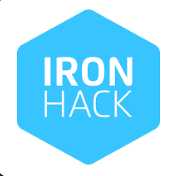

<h1 style="color: #00BFFF;">First Project: Extraction & Cleaning</h1>

<h1 style="color: #00BFFF;">00 | Import</h1>

In [ ]:
import pandas as pd
import numpy as np 

<h1 style="color: #00BFFF;">01 | Data Extraction</h1>

In [ ]:
data = pd.read_csv('market_cap.csv')

<h2 style="color: #008080;">Exploring the Data (First Impression)</h2>

In [ ]:
data.head(3)

In [ ]:
data.shape

In [ ]:
data.dtypes

**First impression:**
    
_____________

The following dataset is a collection of **260** stocks from the Largest Market Cap distributed among 90 different columns. The majority of our data types are mostly **numericals**.

Our **project goal** is to identify players who have the potential to become **the next "Mbappé"**. After reading the [documentation](https://www.kaggle.com/datasets/ekrembayar/fifa-21-complete-player-dataset?select=fifa21_male2.csv) we wil proceed with the following **strategy**:

1. The **target** of our dataset will be `Overall`, which is a summary of a player's performance and potential. 
2. Through **Exploratory Data Analysis** we will identify the features that contribute to this prediction.
_____________

In [ ]:
df2 = data.copy()
df3 = data.copy()

<h2 style="color: #008080;">Standardize Columns</h2>

<h1 style="color: #00BFFF;">02 | Data Cleaning</h1>

In [ ]:
# Select the columns. 
data.columns = [col.lower().replace(" ", "_")for col in data.columns] #snake_case
df = data[['symbol','marketcap','regularmarketprice','averageanalystrating','fiftydayaverage', 'twohundreddayaverage','custompricealertconfidence','bookvalue', 'forwardpe', 'pricetobook','dividendrate','sharesoutstanding']]

In [ ]:
# Rating Cleaning 
def extract_rating(value):
    value = str(value)
    if '-' in value:
        return value.split('-')[1].strip()
    else:
        return value.strip()
df['averageanalystrating'] = df['averageanalystrating'].apply(extract_rating)

In [ ]:
# Rename a few columns. 
df = df.rename(columns={"regularmarketprice": "price",
                       "averageanalystrating": "rating", 
                       "custompricealertconfidence": "confidence",
                        "fiftydayaverage":"50",
                        "twohundreddayaverage":"200",          
                       })
columns_round = ['50', '200','forwardpe', 'pricetobook']
df[columns_round] = df[columns_round].round(2)

<h2 style="color: #008080;">Feature Selection (Dropping unnecesary features)</h2>

In [ ]:
df.columns

In [ ]:
# Drop this Paragraph

<h2 style="color: #008080;">Checking Duplicates</h2>

In [ ]:
df.head(10)

In [ ]:
#Dropping duplicates in specific rows. 
df.drop([2, 5, 8], inplace=True)

<h2 style="color: #008080;">Checking Null Values</h2>

In [ ]:
df.isna().sum()

In [ ]:
df['rating'].value_counts()

In [ ]:
# Filling nan values with no rating. 
df.rating = df.rating.replace({'nan':'no rating'})

In [ ]:
#Filling NaN values forward PE with the mean. 
mean_pe = df['forwardpe'].mean()
df['forwardpe'] = df['forwardpe'].fillna(round(mean_pe,2))

In [ ]:
#Filling NaN values for dividend rate. 
df['dividendrate'] = df['dividendrate'].fillna(0)

In [ ]:
df.isna().sum()

<h2 style="color: #008080;">Checking Emtpy Spaces</h2>

<h2 style="color: #008080;">Reset Index</h2>

In [ ]:
df = df.sort_values(by='marketcap', ascending=False)

In [ ]:
df = df.reset_index()
df.head(10)

In [ ]:
df = df.drop(columns=['index'])

In [ ]:
df.index = df.index +1
df.head(15)

<h2 style="color: #008080;">Create new column called Industry</h2>

In [ ]:
industry_mapping = {
    'AAPL': 'Technology',
    'NVDA': 'Technology',
    'MSFT': 'Technology',
    'GOOG': 'Technology',
    'AMZN': 'Consumer Discretionary',
    'META': 'Communication Services',
    'BRK-B': 'Financials',
    'TSM': 'Technology',
    'AVGO': 'Technology',
    'LLY': 'Healthcare',
    'TSLA': 'Consumer Discretionary',
    'WMT': 'Consumer Staples',
    'JPM': 'Financials',
    'V': 'Financials',
    'NONOF': 'Healthcare',
    'XOM': 'Energy',
    'UNH': 'Healthcare',
    'NVO': 'Healthcare',
    'TCTZF': 'Technology',
    'TCEHY': 'Technology',
    'ORCL': 'Technology',
    'MA': 'Financials',
    'HD': 'Consumer Discretionary',
    'PG': 'Consumer Staples',
    'JNJ': 'Healthcare',
    'COST': 'Consumer Staples',
    'LVMUY': 'Consumer Discretionary',
    'LVMHF': 'Consumer Discretionary',
    'ABBV': 'Healthcare',
    'JPM-PD': 'Financials',
    'JPM-PC': 'Financials',
    'BAC': 'Financials',
    'BML-PH': 'Financials',
    'BML-PG': 'Financials',
    'KO': 'Consumer Staples',
    'NFLX': 'Communication Services',
    'BML-PL': 'Financials',
    'RCIT': 'Technology',
    'IDCBY': 'Financials',
    'BAC-PE': 'Financials',
    'IDCBF': 'Financials',
    'ASMLF': 'Technology',
    'ASML': 'Technology',
    'BML-PJ': 'Financials',
    'MRK': 'Healthcare',
    'CRM': 'Technology',
    'SAPGF': 'Technology',
    'CVX': 'Energy',
    'SAP': 'Technology',
    'GDVTZ': 'Technology',
    'RHHVF': 'Healthcare',
    'TMUS': 'Communication Services',
    'ACGBF': 'Consumer Staples',
    'BAC-PB': 'Financials',
    'BAC-PK': 'Financials',
    'AMD': 'Technology',
    'RHHBY': 'Healthcare',
    'NSRGY': 'Consumer Staples',
    'NSRGF': 'Consumer Staples',
    'RHHBF': 'Healthcare',
    'BABAF': 'Consumer Discretionary',
    'BABA': 'Consumer Discretionary',
    'AZN': 'Healthcare',
    'ACGBY': 'Consumer Staples',
    'HESAF': 'Energy',
    'AZNCF': 'Healthcare',
    'PEP': 'Consumer Staples',
    'HESAY': 'Energy',
    'NVS': 'Healthcare',
    'NVSEF': 'Healthcare',
    'ACN': 'Technology',
    'LIN': 'Materials',
    'TOYOF': 'Consumer Discretionary',
    'TMO': 'Healthcare',
    'TM': 'Consumer Discretionary',
    'CSCO': 'Technology',
    'MCD': 'Consumer Discretionary',
    'ADBE': 'Technology',
    'LRLCY': 'Technology',
    'LRLCF': 'Technology',
    'WFC': 'Financials',
    'IBM': 'Technology',
    'PCCYF': 'Technology',
    'GE': 'Industrials',
    'CICHF': 'Financials',
    'WFC-PY': 'Financials',
    'SHEL': 'Energy',
    'ABT': 'Healthcare',
    'AXP': 'Financials',
    'BACHF': 'Financials',
    'CICHY': 'Financials',
    'WFC-PL': 'Financials',
    'RYDAF': 'Financials',
    'BX': 'Financials',
    'DHR': 'Healthcare',
    'BACHY': 'Financials',
    'MS': 'Financials',
    'QCOM': 'Technology',
    'CAT': 'Industrials',
    'NOW': 'Technology',
    'PM': 'Consumer Staples',
    'IDEXF': 'Technology',
    'IDEXY': 'Technology',
    'VZ': 'Communication Services',
    'TXN': 'Technology',
    'FMX': 'Consumer Staples',
    'RY': 'Financials',
    'PDD': 'Consumer Discretionary',
    'DIS': 'Communication Services',
    'NEE': 'Utilities',
    'AMGN': 'Healthcare',
    'UBER': 'Consumer Discretionary',
    'INTU': 'Technology',
    'ISRG': 'Healthcare',
    'PFE': 'Healthcare',
    'RTX': 'Industrials',
    'GS': 'Financials',
    'SPGI': 'Financials',
    'CMCSA': 'Communication Services',
    'LOW': 'Consumer Discretionary',
    'HSBC': 'Financials',
    'ARM': 'Technology',
    'SMAWF': 'Technology',
    'HDB': 'Financials',
    'HBCYF': 'Financials',
    'UL': 'Consumer Staples',
    'UNLYF': 'Financials',
    'CMWAY': 'Technology',
    'SIEGY': 'Technology',
    'CBAUF': 'Financials',
    'BHPLF': 'Financials',
    'T': 'Communication Services',
    'DTEGY': 'Utilities',
    'AMAT': 'Technology',
    'DTEGF': 'Utilities',
    'TTFNF': 'Technology',
    'UNP': 'Industrials',
    'BLK': 'Financials',
    'PGR': 'Financials',
    'FMXUF': 'Consumer Staples',
    'TTE': 'Energy',
    'BHP': 'Materials',
    'SBGSY': 'Materials',
    'LMT': 'Industrials',
    'SBGSF': 'Materials',
    'BKNG': 'Consumer Discretionary',
    'HON': 'Industrials',
    'CILJF': 'Financials',
    'CIHKY': 'Healthcare',
    'SNYNF': 'Healthcare',
    'CIHHF': 'Healthcare',
    'SYK': 'Healthcare',
    'SNY': 'Healthcare',
    'MPNGF': 'Technology',
    'ETN': 'Industrials',
    'MPNGY': 'Technology',
    'PNGAY': 'Healthcare',
    'TJX': 'Consumer Discretionary',
    'PIAIF': 'Consumer Discretionary',
    'SCHW': 'Financials',
    'HTHIF': 'Financials',
    'BUD': 'Consumer Staples',
    'BUDFF': 'Consumer Staples',
    'ALIZF': 'Consumer Discretionary',
    'ALIZY': 'Consumer Discretionary',
    'BSX': 'Healthcare',
    'ANET': 'Technology',
    'VRTX': 'Healthcare',
    'RTNTF': 'Technology',
    'KKR': 'Financials',
    'MUFG': 'Financials',
    'NKE': 'Consumer Discretionary',
    'WFC-PC': 'Financials',
    'MBFJF': 'Financials',
    'HTHIY': 'Healthcare',
    'COP': 'Energy',
    'PANW': 'Technology',
    'C': 'Financials',
    'MU': 'Technology',
    'PLD': 'Industrials',
    'ADP': 'Technology',
    'CB': 'Financials',
    'EADSY': 'Utilities',
    'UPS': 'Industrials',
    'CHDRF': 'Technology',
    'CHDRY': 'Technology',
    'MDT': 'Healthcare',
    'EADSF': 'Utilities',
    'ELV': 'Healthcare',
    'FI': 'Healthcare',
    'ADI': 'Technology',
    'SONY': 'Technology',
    'ABLZF': 'Technology',
    'SNEJF': 'Technology',
    'MMC': 'Financials',
    'DE': 'Industrials',
    'BYDDY': 'Consumer Discretionary',
    'BYDDF': 'Consumer Discretionary',
    'CUAEF': 'Technology',
    'REGN': 'Healthcare',
    'FRCOF': 'Technology',
    'FRCOY': 'Technology',
    'ESLOF': 'Technology',
    'CSUAY': 'Technology',
    'RTPPF': 'Technology',
    'KYCCF': 'Technology',
    'BMY': 'Healthcare',
    'SBUX': 'Consumer Discretionary',
    'AIQUF': 'Technology',
    'AIQUY': 'Technology',
    'GILD': 'Healthcare',
    'ESLOY': 'Healthcare',
    'SNPMF': 'Healthcare',
    'RIO': 'Materials',
    'PROSF': 'Technology',
    'AMT': 'Real Estate',
    'HCA': 'Healthcare',
    'SHOP': 'Consumer Discretionary',
    'ABBNY': 'Consumer Discretionary',
    'IBN': 'Financials',
    'UBS': 'Financials',
    'MELI': 'Consumer Discretionary',
    'PROSY': 'Consumer Discretionary',
    'SO': 'Utilities',
    'RCRRF': 'Technology',
    'CI': 'Healthcare',
    'TD': 'Financials',
    'SAFRF': 'Financials',
    'SHW': 'Materials',
    'IBDRY': 'Technology',
    'IBDSF': 'Technology',
    'CSLLY': 'Consumer Staples',
    'CMXHF': 'Technology',
    'RCRUY': 'Technology',
    'LRCX': 'Technology',
    'MDLZ': 'Consumer Staples',
    'BA': 'Industrials',
    'INTC': 'Technology',
    'SAFRY': 'Financials',
    'INFY': 'Technology',
    'ICE': 'Financials',
    'AAIGF': 'Consumer Staples',
    'IVSBF': 'Healthcare',
    'PLTR': 'Technology',
    'DUK': 'Utilities',
    'SFTBF': 'Technology',
    'KLAC': 'Technology',
    'IVSXF': 'Healthcare',
    'ENB': 'Energy',
    'PBR-A': 'Energy',
    'PBR': 'Energy',
    'USB-PH': 'Financials',
    'SFTBY': 'Technology',
    'UNCRY': 'Financials',
    'UNCFF': 'Financials',
    'ICLTF': 'Technology',
    'BAC-PL': 'Financials'
}
df['industry'] = df['symbol'].map(industry_mapping)

In [ ]:
df.sample(10)

In [ ]:
df['industry'].value_counts()

<h1 style="color: #00BFFF;">03 | EDA (Exploratory Data Analysis)</h1>

<h2 style="color: #008080;">Statistical information about the numerical columns</h2>

In [ ]:
market = df.groupby('industry')['marketcap'].sum().reset_index()

In [ ]:
market1 = market.sort_values(by='marketcap', ascending=False).reset_index(drop=True)
market1.index = market1.index +1

In [ ]:
market1

From this information we do can extract that the most market cap is in the **Technology** Industry.
And the lowest market cap is in **Real State**. Which means that when trying to select a stock it is helpful to know in which industries are more active. And the investors likes the most. 

In [ ]:
forward = df.groupby('industry')['forwardpe'].mean().round(2).reset_index()

In [ ]:
forward1 = forward.sort_values(by='forwardpe', ascending=False).reset_index(drop=True)
forward1.index = forward1.index +1
forward1

**MODIFY**
From this information we do can extract that the most market cap is in the **Technology** Industry.
And the lowest market cap is in **Real State**. Which means that when trying to select a stock it is helpful to know in which industries are more active. And the investors likes the most. 

In [ ]:
df.loc[df['industry'] == 'Technology'].head(3)

In [ ]:
df.loc[df['industry'] == 'Financials'].head(3)

In [ ]:
df.loc[df['industry'] == 'Healthcare'].head(3)

Most important companies in the Technological industry: 
- **Apple**
- **Nvidia**
- **Microsoft**

Most important companies in the Financials Industry: 
- **Berhshire Hathaway**
- **JP Morgan**
- **Visa**

Most important companies in the Healthcare Industry: 
- **Eli Lily**
- **Novo Nordisk**
- **UnitedHealth**

In [ ]:
df['rating'].value_counts()

In [ ]:
round(df.rating.value_counts("Buy") * 100, 2).reset_index()

From this value counts, we can extract that we are not in a bear market: 
   + **67%** (Buy, Hold, Strong Buy)
   + **33%** (No rating, Underperform)

Rating confirms that 67% of the stocks are a buy or hold. 

In [ ]:
#Good to have important mean for rating in and forward pe. 
pivot_rat = round(df.pivot_table(index='rating', values='forwardpe'), 2)
pivot_rat

In [ ]:
pivot_pe = round(df.pivot_table(index='industry', columns='rating', values='forwardpe'), 2)
pivot_pe

In [ ]:
pivot_con = round(df.pivot_table(index='industry',columns='confidence', values='forwardpe'), 2)
pivot_con

In [ ]:
df['forwardpe'].mean().round(2)

In [ ]:
high_pe = df[df['forwardpe'] > 25].head(10)
high_pe

In [ ]:
# High PE high valuation and high expectations. 
high_pe1 = high_pe.sort_values(by='forwardpe', ascending=False)
high_pe1.head(5)

In [ ]:
# Dividend Anually 
high_dividend = df.sort_values(by='dividendrate', ascending=False)
high_dividend.head(10)

In [ ]:
df.groupby('rating')['dividendrate'].mean().round(2)

<h1 style="color: #00BFFF;">07 | Reporting</h1>